In this notebook I implement the gradient descent algorithm in order to solve simple linear regression. The dataset used is avalable in [kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) and expresses how salary as depends on experience for few data points.

In [167]:
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sqlite3
import pandas
from math import ceil
import copy
import math

In [128]:
connection = sqlite3.connect('data/Salary.db')
cursor = connection.cursor()

df = pandas.read_csv('data/Salary_dataset.csv')

cursor.executescript("""
DROP TABLE IF EXISTS salary;
CREATE TABLE salary(id INTEGER UNIQUE,
                    YearsExperience INTEGER,
                    Salary REAL
);
""")

df_sql = df.to_sql('salary',con=connection, if_exists='append', index=False)

In [236]:
cursor.execute("SELECT YearsExperience, Salary from salary")
data = np.array(cursor.fetchall())
x = data[:,0]
y = data[:,1]/1e4

In [168]:
def cost_function(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    cost = (f_wb - y)**2
    J = 1/(2*m)*sum(cost) #total cost
    return J

In [169]:
def gradient(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    func_w = (f_wb - y)*x
    func_b = f_wb - y
    dJ_dw = 1/m*sum(func_w)
    dJ_db = 1/m*sum(func_b)
    return dJ_dw, dJ_db

In [170]:
def gradient_descent(x, y, alpha, w, b, n_iter):
    J_history, w_history, b_history = [],[],[]
    
    i = 0
    while i < n_iter:    
        dJ_dw, dJ_db = gradient(x, y, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        i = i+1
        J = cost_function(x, y, w, b)
        J_history.append(J)
        w_history.append(w)
        b_history.append(b)
        if i% ceil(n_iter / 10) == 0:
            print('Iteration:%i  w=%.2f  b=%.2f  J=%.2f'%(i,w,b,J))
    return w, b, J_history, w_history, b_history

In [254]:
def scale_z_score(x_train):
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_scaled = (x_train - mean)/std
    return x_scaled

x_s = scale_z_score(x)
y_s = scale_z_score(y)

In [263]:
w_res, b_res, J_history, w_history, b_history = gradient_descent(x_s, y, alpha=1e-1, w=1, b=1, n_iter=100)

Iteration:10  w=2.07  b=5.30  J=2.97
Iteration:20  w=2.44  b=6.80  J=0.50
Iteration:30  w=2.57  b=7.32  J=0.20
Iteration:40  w=2.61  b=7.50  J=0.16
Iteration:50  w=2.63  b=7.57  J=0.16
Iteration:60  w=2.63  b=7.59  J=0.16
Iteration:70  w=2.64  b=7.60  J=0.16
Iteration:80  w=2.64  b=7.60  J=0.16
Iteration:90  w=2.64  b=7.60  J=0.16
Iteration:100  w=2.64  b=7.60  J=0.16


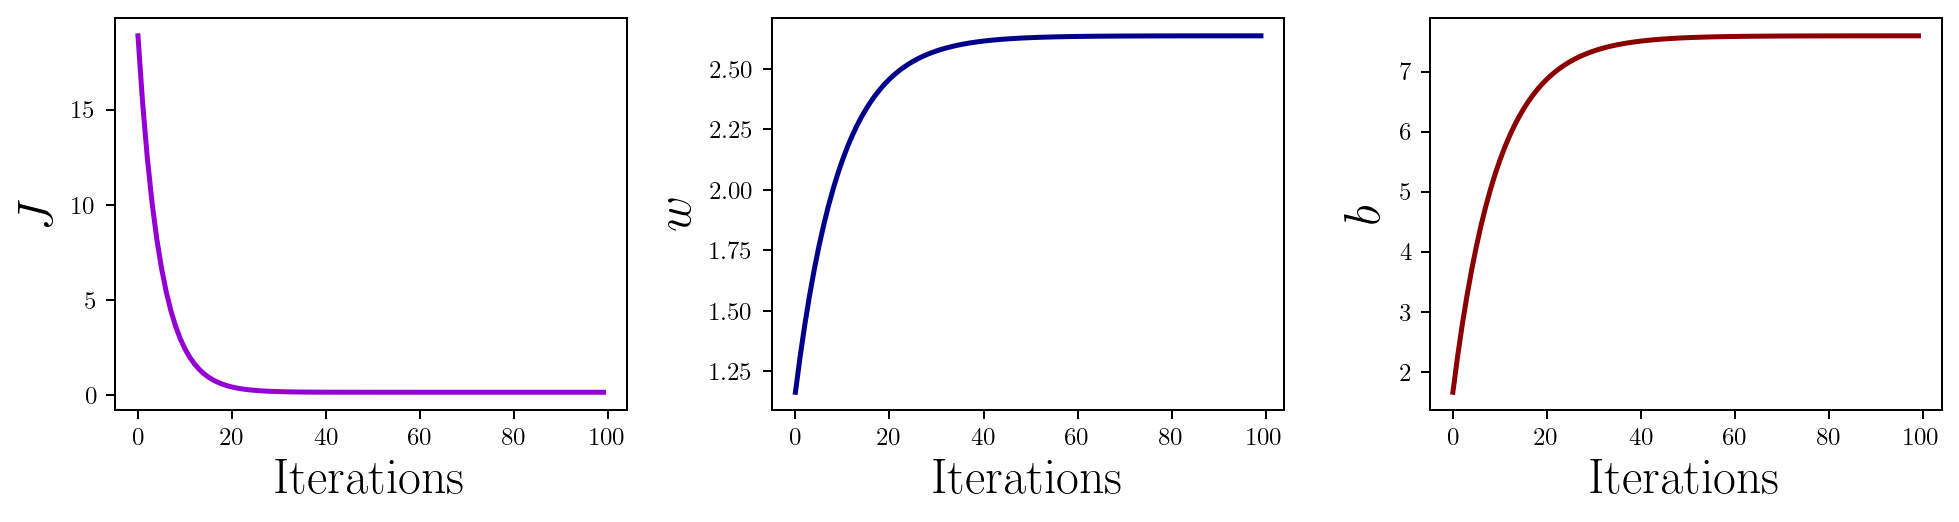

In [270]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,3), dpi=180)
ax1.plot(np.arange(len(J_history)), J_history, lw=2, c='darkviolet')
ax2.plot(np.arange(len(w_history)), w_history, lw=2, c='darkblue')
ax3.plot(np.arange(len(b_history)), b_history, lw=2, c='darkred')
pt = 20

ax1.set_xlabel(r'Iterations',fontsize=pt)
ax2.set_xlabel(r'Iterations',fontsize=pt)
ax3.set_xlabel(r'Iterations',fontsize=pt)
ax1.set_ylabel(r'$J$',fontsize=pt)
ax2.set_ylabel(r'$w$',fontsize=pt)
ax3.set_ylabel(r'$b$',fontsize=pt)
plt.tight_layout()
plt.show()

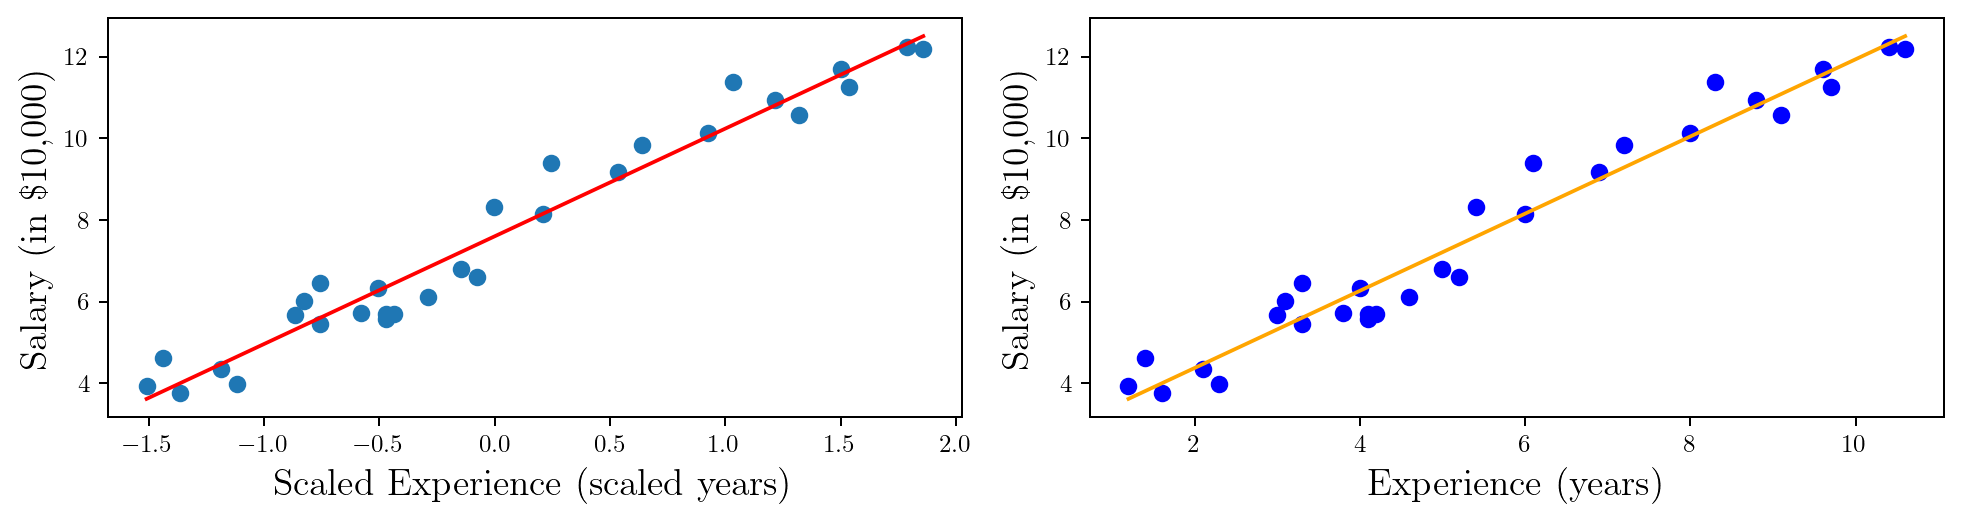

In [279]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,3), dpi=180)
ax1.scatter(x_s,y)
ax1.plot(x_s, w_res*x_s + b_res,'r-')
ax2.scatter(x,y,c='b')
ax2.plot(x, w_res*x_s + b_res,c='orange')

pt = 15
ax1.set_xlabel(r'Scaled Experience (scaled years)',fontsize=pt)
ax2.set_xlabel(r'Experience (years)',fontsize=pt)
ax1.set_ylabel(r'Salary (in \$10,000)',fontsize=pt)
ax2.set_ylabel(r'Salary (in \$10,000)',fontsize=pt)
plt.tight_layout()
plt.show()